<h1 align="center">DEVELOPMENT OF MACHINE LEARNING DRIVEN PREDICTION OF TROPICAL AGRICULTURAL PRODUCE IN NIGERIA (FOOD CROP)</h1>

# Import Libraries

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import joblib

from sklearn import set_config
set_config(display='diagram')

import warnings
warnings.filterwarnings('ignore')

# Load Dataset

In [2]:
df = pd.read_csv('/kaggle/input/crop-yield/crop-yield.csv')

# Dataset Preview

In [3]:
df.head()

,Crop,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
0,Coconut,19656.0,126905000,2051.4,1870661.52,6093.36,5238.051739
1,Cotton,1739.0,794,2051.4,165500.63,539.09,0.420909
2,Pepper,13587.0,9073,2051.4,1293074.79,4211.97,0.643636
3,Maize,19216.0,14721,2051.4,1828786.72,5956.96,0.615652
4,Onion,7832.0,17943,2051.4,745371.44,2427.92,2.342609


In [4]:
df.describe()

,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
count,7.820000e+03,7.820000e+03,7820.000000,7.820000e+03,7.820000e+03,7820.000000
mean,2.631691e+05,4.093528e+07,1522.239532,3.543416e+07,7.119879e+04,198.167296
std,7.355198e+05,4.162206e+08,889.791150,1.018856e+08,2.083008e+05,1385.343155
min,1.000000e+00,0.000000e+00,301.300000,9.467000e+01,9.000000e-02,0.000000
25%,1.929500e+03,3.603250e+03,953.800000,2.644359e+05,4.956000e+02,1.000000
50%,1.721400e+04,4.428950e+04,1296.600000,2.294561e+06,4.548150e+03,1.867915
75%,1.297915e+05,4.712280e+05,1788.825000,1.744091e+07,3.457607e+04,4.400062
max,8.629000e+06,6.326000e+09,6552.700000,1.301253e+09,2.674990e+06,21105.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7820 entries, 0 to 7819
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Crop             7820 non-null   object 
 1   Area             7820 non-null   float64
 2   Production       7820 non-null   int64  
 3   Annual_Rainfall  7820 non-null   float64
 4   Fertilizer       7820 non-null   float64
 5   Pesticide        7820 non-null   float64
 6   Yield            7820 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 427.8+ KB


In [6]:
df['Crop'].unique()

array(['Coconut', 'Cotton', 'Pepper', 'Maize', 'Onion', 'Rice', 'Millet',
       'Sugarcane', 'Yam', 'Cassava', 'Ginger', 'Groundnut', 'Sorghum',
       'Cashew', 'Banana', 'Soybean', 'Cowpea'], dtype=object)

# Data Preprocessing

In [7]:
X, y = df.drop(columns=['Yield', 'Production']), df['Yield']

In [8]:
num_cols = X.select_dtypes(include=np.number).columns.to_list()
cat_cols = X.select_dtypes(exclude=np.number).columns.to_list()

print(num_cols, end='\n\n')
print(cat_cols)

['Area', 'Annual_Rainfall', 'Fertilizer', 'Pesticide']

['Crop']


In [9]:
num_pipeline = Pipeline(steps=[
    ('num_imputer', SimpleImputer(strategy='mean')),
    ('scaler', MinMaxScaler())
])

cat_pipeline = Pipeline(steps=[
    ('cat_imputer', SimpleImputer(strategy='most_frequent')),
    ('one_hot_enc', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

In [10]:
col_trans = ColumnTransformer(transformers=[
    ('num_pipeline', num_pipeline, num_cols),
    ('cat_pipeline', cat_pipeline, cat_cols),
    ],
    remainder='drop',
    n_jobs=-1
)

In [11]:
set_config(display='diagram')
display(col_trans)

ColumnTransformer(n_jobs=-1,
                  transformers=[('num_pipeline',
                                 Pipeline(steps=[('num_imputer',
                                                  SimpleImputer()),
                                                 ('scaler', MinMaxScaler())]),
                                 ['Area', 'Annual_Rainfall', 'Fertilizer',
                                  'Pesticide']),
                                ('cat_pipeline',
                                 Pipeline(steps=[('cat_imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('one_hot_enc',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['Crop'])])

In [12]:
X_preprocessed = col_trans.fit_transform(X)
X_preprocessed

array([[2.27778448e-03, 2.79953290e-01, 1.43751192e-03, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.01413860e-04, 2.79953290e-01, 1.27112826e-04, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.57445840e-03, 2.79953290e-01, 9.93642293e-04, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [4.63437300e-04, 1.91429120e-01, 3.03634495e-04, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [3.60275856e-02, 1.68746201e-01, 2.27370373e-02, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [3.19556185e-02, 1.68746201e-01, 2.01672158e-02, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [13]:
X_preprocessed.shape

(7820, 21)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2, random_state=42)

# Define Helper Functions

In [15]:
def evaluate_model(model, X_train, y_train, X_test, y_test):
    y_pred = model.predict(X_test) 
    
    MAE = mean_absolute_error(y_test, y_pred)
    
    r2 = model.score(X_test, y_test)
    
    # Number of observations is the shape along axis 0
    n = X_test.shape[0]
    
    # Number of features (predictors, p) is the shape along axis 1
    p = X_test.shape[1]
    
    # Adjusted R-squared formula
    adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
    R2 = model.score(X_test, y_test)
    
    return R2, adjusted_r2, RMSE, MAE

In [16]:
def metric_df(model, model_name):
    df = [evaluate_model(model, X_train, y_train, X_test, y_test)]
    model_metrics = pd.DataFrame(data = df, columns=['R2 Score','Adjusted R2 Score','RMSE', 'MAE'])
    model_metrics.insert(0, 'Model', model_name)
    
    return model_metrics

# Model Building

In [17]:
models = [
    (RandomForestRegressor(), 'Random Forest Regressor'),
    (ElasticNet(), 'Elastic Net'),
    (SVR(), 'Support Vector Regressor')
]

In [18]:
predictions = []

In [19]:
for model, model_name in models:
    model.fit(X_train, y_train)
    model_metrics = metric_df(model, model_name)
    predictions.append(model_metrics)

In [20]:
predictions = pd.concat(predictions, ignore_index=True, sort=False)

predictions.sort_values(by=['RMSE'], ascending=False).style.hide(axis='index')

Model,R2 Score,Adjusted R2 Score,RMSE,MAE
Support Vector Regressor,-0.000286,-0.013908,1409.804413,209.504780
Elastic Net,0.074656,0.062054,1355.964935,368.586499
Random Forest Regressor,0.972151,0.971771,235.236767,27.264314


## 7. Result Visualization

In [21]:
sns.set_style('darkgrid')

In [22]:
rmse_mae = predictions[['Model', 'RMSE', 'MAE']]

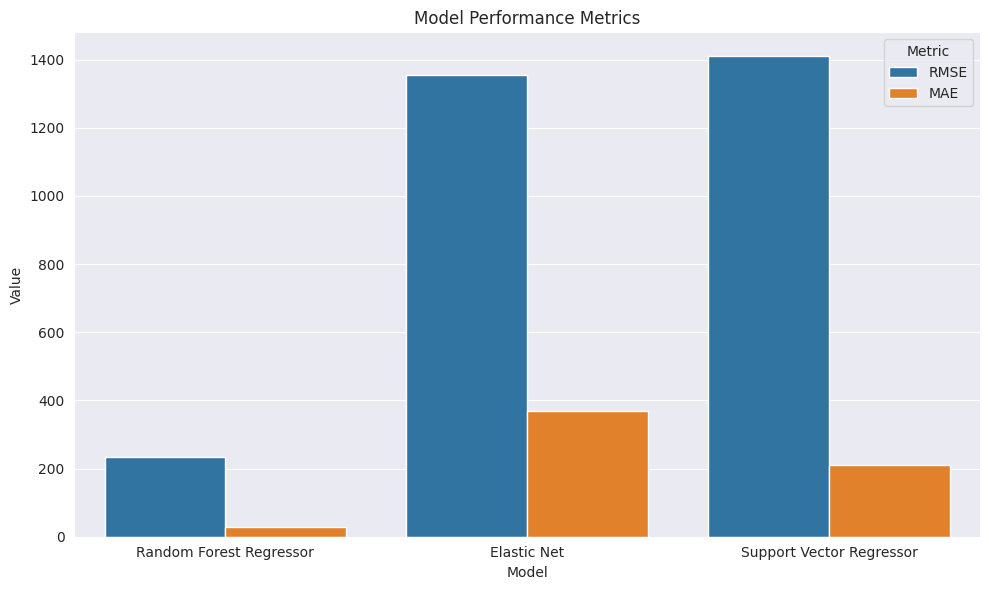

In [23]:
# Plot using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(data=rmse_mae.melt(id_vars='Model', var_name='Metric', value_name='Value'), x='Model', y='Value', hue='Metric')
plt.title('Model Performance Metrics')
plt.xlabel('Model')
plt.ylabel('Value')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

## 8. Save Model

In [24]:
mapping = {
    'num_cols': num_cols, # might not need this
    'cat_cols': cat_cols, # might not need this
    'preprocessor': col_trans,
    'regressor_model': RandomForestRegressor().fit(X_train, y_train)
}

In [25]:
joblib.dump(mapping, 'prediction_components.joblib')

['prediction_components.joblib']

## 9. Prediction on a single sample

In [26]:
prediction_components = joblib.load('/kaggle/working/prediction_components.joblib')
preprocessor = prediction_components['preprocessor']
regressor_model = prediction_components['regressor_model']

In [27]:
data = [10.2, 100, 22.1, 21022, 3881, 'Rice'] # just some random data

field_names = ['Area', 'Production', 'Annual_Rainfall', 'Fertilizer', 'Pesticide', 'Crop']

In [28]:
matrix = np.array(data).reshape(1, -1)

data = pd.DataFrame(matrix, columns=field_names)

preprocessed_data = preprocessor.transform(data)

prediction = regressor_model.predict(preprocessed_data)

print(prediction)

[2.40607012]
